In [ ]:
!pip install pandas==1.2.0
!pip install xlrd==1.2.0
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 7.5 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 103 kB 8.6 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
df_al = pd.read_excel('/content/drive/MyDrive/DAL/aluminum6061.xls')

Mounted at /content/drive
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [ ]:
df_al.head()

,TESTNUM,POINTNUM,TIME,POSIT,FORCE,EXT,CH5,CH6,CH7,CH8
0,761,1,6.532,0.01524,201.158508,0.018893,-0.023081,NaN,NaN,NaN
1,761,2,6.702,0.01600,205.978119,0.000265,-0.013024,NaN,NaN,NaN
2,761,3,7.098,0.01720,219.295441,-0.000877,-0.024879,NaN,NaN,NaN
3,761,4,8.697,0.02350,268.505890,0.001453,-0.006798,NaN,NaN,NaN
4,761,5,10.196,0.03004,322.028168,0.001865,0.012563,NaN,NaN,NaN


In [ ]:
df_al.shape

(200, 10)

In [ ]:
df_al.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TESTNUM   200 non-null    int64  
 1   POINTNUM  200 non-null    int64  
 2   TIME      200 non-null    float64
 3   POSIT     200 non-null    float64
 4   FORCE     200 non-null    float64
 5   EXT       200 non-null    float64
 6   CH5       200 non-null    float64
 7   CH6       0 non-null      float64
 8   CH7       0 non-null      float64
 9   CH8       0 non-null      float64
dtypes: float64(8), int64(2)
memory usage: 15.8 KB


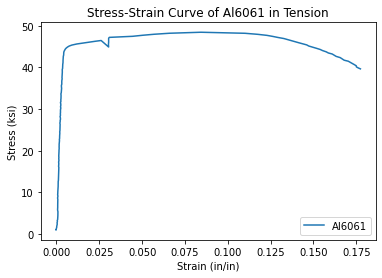

In [ ]:
d = 0.506
r = d/2
A = np.pi*r**2
stress_al = (df_al['FORCE']/A)*0.001
strain_al = df_al['CH5']*0.01

fig,ax = plt.subplots()
ax.plot(strain_al, stress_al)
ax.set_xlabel('Strain (in/in)')
ax.set_ylabel('Stress (ksi)')
ax.set_title('Stress-Strain Curve of Al6061 in Tension')
ax.legend(['Al6061'])
plt.show()

In [ ]:
# Calculate the tensile strength
ts_al = np.max(stress_al)
print(f'The tensile strength of Al6061 is: {round(ts_al,1)} ksi')

The tensile strength of Al6061 is: 48.5 ksi


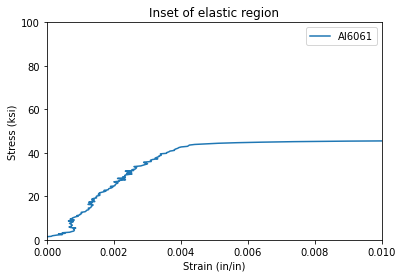

In [ ]:
fig,ax = plt.subplots()
ax.plot(strain_al, stress_al)
ax.set_title('Inset of elastic region')
ax.set_xlabel('Strain (in/in)')
ax.set_ylabel('Stress (ksi)')
ax.legend(['Al6061'])
ax.set_xlim([0,0.01])
ax.set_ylim([0,100])
plt.show()

In [ ]:
# Find the elastic modulus of Al6061
# use stress and strain values from stress=0 to stress=35 ksi
linear_stress_al_mask = stress_al < 35
linear_stress_al = stress_al[linear_stress_al_mask]
linear_strain_al = strain_al[linear_stress_al_mask]
from scipy.stats import linregress
linear_regression_output = linregress(linear_strain_al, linear_stress_al)
E_al = linear_regression_output[0]
print(f'The elastic modulus of Al6061 is {round(E_al,1)} ksi')

The elastic modulus of Al6061 is 12994.6 ksi


In [ ]:
# Find the ductility for Al6061
stress_al_array = np.array(stress_al)
stress_al_last = stress_al_array[-1]
strain_al_array = np.array(strain_al)
strain_al_last = strain_al_array[-1]
EL_al = -stress_al_last/E_al + strain_al_last
print(f'The ductility of Al6061 is {round(EL_al*100,1)}%')

The ductility of Al6061 is 17.4%
